3_SSE:12807.182599365586
4_SSE:11469.488444289309
5_SSE:10521.757300054333
6_SSE:9761.66968543559
7_SSE:9005.702471988312
8_SSE:8336.832968085067
9_SSE:7921.133488896609
10_SSE:7552.980449630382
11_SSE:7205.2652283377065
12_SSE:6939.785943120086
13_SSE:6655.795709617674
14_SSE:6457.008479124895
15_SSE:18706.589107982236
16_SSE:18706.589107982236
17_SSE:5905.634430439073
18_SSE:5651.31968555447
19_SSE:18706.589107982236


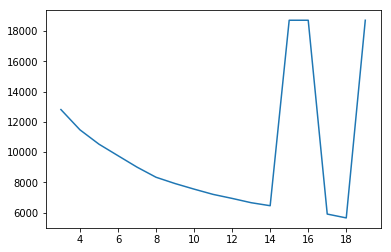

In [147]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from copy import deepcopy

#reading from Database uding pandas    
df = pd.read_csv ('data_kmeans_1.csv')
data=np.array(df.T)
x=data[0]
y=data[1]





# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


X = np.array(list(zip(f1, f2)))

def sse_dist(a,b):
    return np.sqrt((a[0]-b[0])^2+(a[1]-b[1])^2)

# Number of clusters
SSE_list = []
for k in range(3,20):
    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(x), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(y), np.max(y), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print(C)



    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    #while error != 0:


    
    for counter in range(20):
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        
    SSE=0;    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
        for n in range(len(points)):
            SSE = SSE+ np.linalg.norm(points[n]-C[i])         
    
        
    SSE_list.append(SSE)
    print('{}_SSE:{}'.format(k,SSE))


plt.plot(range(3,20),SSE_list)

## So base on Elbow Plot we select k=14

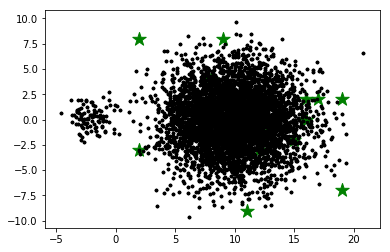

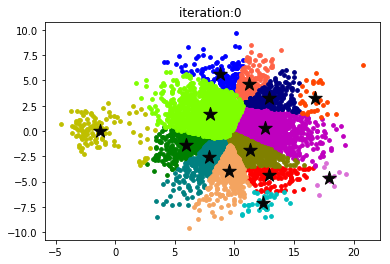

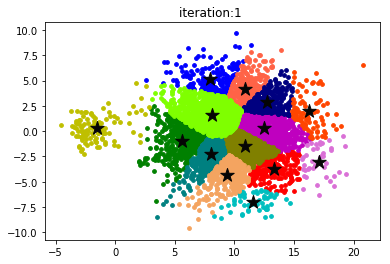

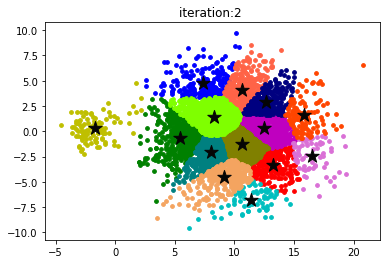

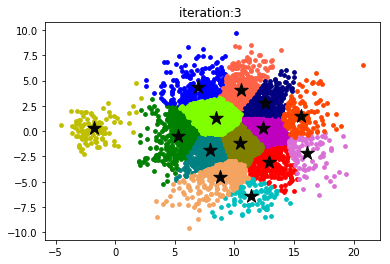

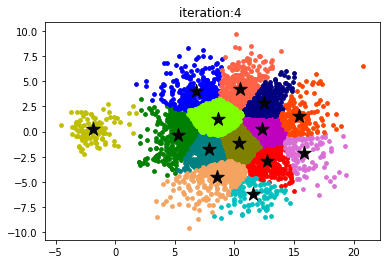

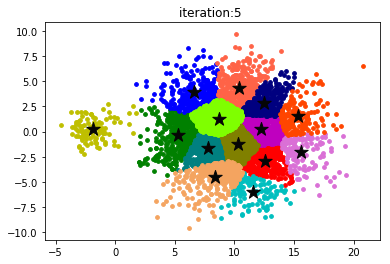

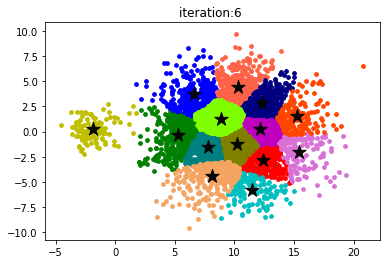

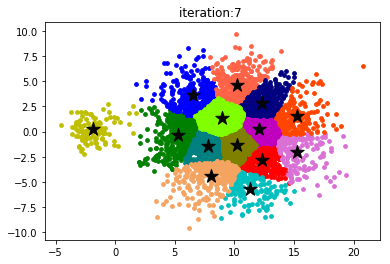

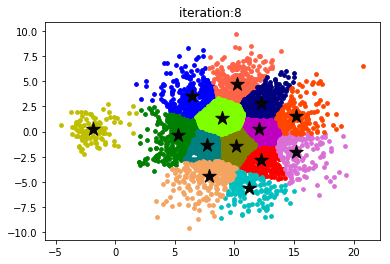

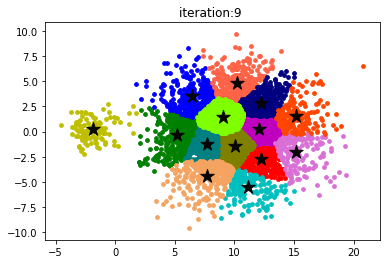

In [151]:
# Plotting along with the Centroids
k=14
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

plt.scatter(x,y, c='black', s=7)


# X coordinates of random centroids
C_x = np.random.randint(0, np.max(x), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(np.min(y), np.max(y), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
#print(C)



# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
#while error != 0:

colors = ['r', 'g', 'b', 'y', 'c', 'm','orchid','teal','olive','tomato','navy','sandybrown','chartreuse','orangered']


for counter in range(10):
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=14, c=colors[i])
            ax.set_title("iteration:{} ".format(counter))
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
 
plt.show()

    

10_SSE:2022.88196667482
20_SSE:2022.88196667482
30_SSE:2022.88196667482
40_SSE:2022.88196667482
50_SSE:2022.88196667482
60_SSE:2022.88196667482
70_SSE:525.3497979290349
80_SSE:506.56119370645627
90_SSE:2022.88196667482


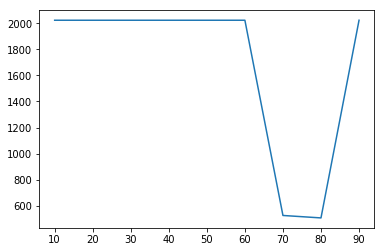

In [176]:
#plot SSE based on number of iteration 
SSE_list=[]
k=14



for NumOfIteration in range(10,100,10):

    C_x = np.random.randint(0, np.max(x), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(y), np.max(y), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print(C)



    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    #while error != 0:


    
    for counter in range(NumOfIteration):
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    SSE=0;    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

        for n in range(len(points)):
            SSE = SSE+ np.linalg.norm(points[n]-C[i])         


    SSE_list.append(SSE)
    print('{}_SSE:{}'.format(NumOfIteration,SSE))

plt.plot(range(10,100,10),SSE_list)
plt.show()
